# TESTE PARA ANALISAR A CORRELAÇÃO ENTRE RENDA E PASSAGEIRO

In [1]:
# Pacotes
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [2]:
pearson_caminho = r"C:\Users\Administrador\Downloads\TCC-20240110T120732Z-001\Dados_UP Gloria\Dados_gerais2.xlsx"
teste_pearson = pd.read_excel(pearson_caminho)
teste_pearson.head()

,Hexagono,Bairro,UP,Mes,Aumentou,Quantidade_passageiros(Y),Numero_linhas,Frequencia_HEX,Populacao,Renda_DOMICILIAR,Quantidade_escolas,Cluster
0,89a88cd8527ffff,São Salvador,Glória,"agosto, 2022",0,42,1,86,1328,704.1,1,2
1,89a88cd8537ffff,Glória,Glória,"agosto, 2022",0,61,3,100,1245,668.0,1,0
2,89a88cd8583ffff,Glória,Glória,"agosto, 2022",0,76,3,306,1703,627.0,1,0
3,89a88cd8587ffff,Glória,Glória,"agosto, 2022",0,19,1,44,1143,621.8,0,2
4,89a88cd8593ffff,Álvaro Camargos,Glória,"agosto, 2022",0,17,1,52,2192,631.6,0,0


In [3]:

# Calculando a correlação de Pearson entre 'Quantidade_passageiros(Y)' e 'Renda_DOMICILIAR'
coeficiente_correlacao, p_valor = pearsonr(teste_pearson['Quantidade_passageiros(Y)'], teste_pearson['Renda_DOMICILIAR'])

coeficiente_correlacao, p_valor

(0.023178541927030193, 0.5837996894037961)

In [4]:
# Filtrar o dataframe para o cluster 
cluster_0_df = teste_pearson[teste_pearson['Cluster'] == 0]

# Mostrar as primeiras linhas do dataframe filtrado para o cluster 
cluster_0_df.head()

,Hexagono,Bairro,UP,Mes,Aumentou,Quantidade_passageiros(Y),Numero_linhas,Frequencia_HEX,Populacao,Renda_DOMICILIAR,Quantidade_escolas,Cluster
1,89a88cd8537ffff,Glória,Glória,"agosto, 2022",0,61,3,100,1245,668.0,1,0
2,89a88cd8583ffff,Glória,Glória,"agosto, 2022",0,76,3,306,1703,627.0,1,0
4,89a88cd8593ffff,Álvaro Camargos,Glória,"agosto, 2022",0,17,1,52,2192,631.6,0,0
8,89a88cd85afffff,Glória,Glória,"agosto, 2022",0,8,3,94,1420,753.5,0,0
9,89a88cd85b3ffff,Novo Glória,Glória,"agosto, 2022",0,219,3,308,2021,725.7,1,0


In [5]:
# Calculando a correlação de Pearson entre 'Quantidade_passageiros(Y)' e 'Renda_DOMICILIAR'
coeficiente_correlacao, p_valor = pearsonr(cluster_0_df['Quantidade_passageiros(Y)'], cluster_0_df['Renda_DOMICILIAR'])

coeficiente_correlacao, p_valor

(0.1051797253495263, 0.14028439618523966)

In [6]:
# Filtrar o dataframe para o cluster 
cluster_1_df = teste_pearson[teste_pearson['Cluster'] == 1]

# Mostrar as primeiras linhas do dataframe filtrado para o cluster 
cluster_1_df.head()
# Calculando a correlação de Pearson entre 'Quantidade_passageiros(Y)' e 'Renda_DOMICILIAR'
coeficiente_correlacao, p_valor = pearsonr(cluster_1_df['Quantidade_passageiros(Y)'], cluster_1_df['Renda_DOMICILIAR'])

coeficiente_correlacao, p_valor

(0.9886335194169606, 6.198913085478071e-18)

In [7]:
# Filtrar o dataframe para o cluster 
cluster_2_df = teste_pearson[teste_pearson['Cluster'] == 2]

# Mostrar as primeiras linhas do dataframe filtrado para o cluster 
cluster_2_df.head()
# Calculando a correlação de Pearson entre 'Quantidade_passageiros(Y)' e 'Renda_DOMICILIAR'
coeficiente_correlacao, p_valor = pearsonr(cluster_2_df['Quantidade_passageiros(Y)'], cluster_2_df['Renda_DOMICILIAR'])

coeficiente_correlacao, p_valor

(-0.4077761424410765, 1.9258050668661705e-12)

In [8]:
# Filtrar o dataframe para o cluster 
cluster_3_df = teste_pearson[teste_pearson['Cluster'] == 3]

# Mostrar as primeiras linhas do dataframe filtrado para o cluster 
cluster_3_df.head()
# Calculando a correlação de Pearson entre 'Quantidade_passageiros(Y)' e 'Renda_DOMICILIAR'
coeficiente_correlacao, p_valor = pearsonr(cluster_3_df['Quantidade_passageiros(Y)'], cluster_3_df['Renda_DOMICILIAR'])

coeficiente_correlacao, p_valor

(-0.074075160156291, 0.554450555672417)

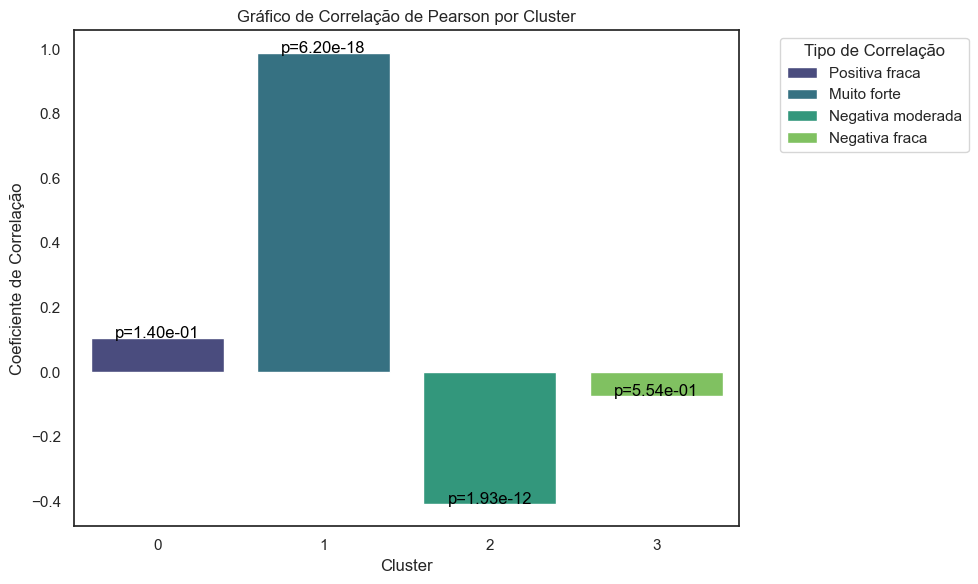

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Cluster': [0, 1, 2, 3],
    'Coef. De correlação': [0.1051, 0.9886, -0.4078, -0.0740],
    'p-valor': [0.1402, 6.20e-18, 1.93e-12, 0.5544],
    'Correlação': ['Positiva fraca', 'Muito forte', 'Negativa moderada', 'Negativa fraca']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Configurando o estilo do gráfico
sns.set(style="white", rc={'axes.grid' : False})

# Criando o gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Cluster', y='Coef. De correlação', data=df, hue='Correlação', palette="viridis")

# Adicionando anotações de p-valor
for index, row in df.iterrows():
    barplot.text(row.name, row['Coef. De correlação'], f'p={row["p-valor"]:.2e}', color='black', ha="center")

# Adicionando título e rótulos
plt.title('Gráfico de Correlação de Pearson por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Coeficiente de Correlação')

# Ajustando a legenda
plt.legend(title='Tipo de Correlação', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()